In [1]:
import os
import numpy as np
import unicodedata

# Ruta base
ruta_base = '/Users/Leon/Documents/Data GH/Aprendizaje automático /T4/data_tarea/train'
ruta_base = unicodedata.normalize('NFC', ruta_base)

train = []

# Recorrer cada subcarpeta (clase)
for clase in os.listdir(ruta_base):
    ruta_clase = os.path.join(ruta_base, clase)
    
    if os.path.isdir(ruta_clase):
        ruta_features = os.path.join(ruta_clase, 'features')
        
        if os.path.isdir(ruta_features):
            descriptores_clase = []
            
            for archivo in os.listdir(ruta_features):
                if archivo.endswith('.npy'):
                    ruta_archivo = os.path.join(ruta_features, archivo)
                    try:
                        datos = np.load(ruta_archivo)
                        if datos.shape[1] == 128:
                            descriptores_clase.append(datos)
                    except Exception as e:
                        print(f"Error cargando {ruta_archivo}: {e}")
            
            train.append(descriptores_clase)

# Verificar estructura
print(f"Total de clases: {len(train)}")
for i, clase in enumerate(train):
    print(f"Clase {i}: {len(clase)} imágenes. Primer descriptor tiene forma: {clase[0].shape if clase else 'vacía'}")



Total de clases: 15
Clase 0: 100 imágenes. Primer descriptor tiene forma: (1000, 128)
Clase 1: 100 imágenes. Primer descriptor tiene forma: (845, 128)
Clase 2: 100 imágenes. Primer descriptor tiene forma: (896, 128)
Clase 3: 100 imágenes. Primer descriptor tiene forma: (701, 128)
Clase 4: 100 imágenes. Primer descriptor tiene forma: (871, 128)
Clase 5: 100 imágenes. Primer descriptor tiene forma: (1001, 128)
Clase 6: 100 imágenes. Primer descriptor tiene forma: (1000, 128)
Clase 7: 100 imágenes. Primer descriptor tiene forma: (636, 128)
Clase 8: 100 imágenes. Primer descriptor tiene forma: (751, 128)
Clase 9: 100 imágenes. Primer descriptor tiene forma: (756, 128)
Clase 10: 100 imágenes. Primer descriptor tiene forma: (1000, 128)
Clase 11: 100 imágenes. Primer descriptor tiene forma: (493, 128)
Clase 12: 100 imágenes. Primer descriptor tiene forma: (581, 128)
Clase 13: 100 imágenes. Primer descriptor tiene forma: (1000, 128)
Clase 14: 100 imágenes. Primer descriptor tiene forma: (1000,

In [61]:
train_redondeado = []

for clase in train:
    clase_redondeada = []
    for imagen in clase:
        # Asegúrate de que sea un array NumPy 2D
        if isinstance(imagen, np.ndarray) and imagen.ndim == 2 and imagen.shape[1] == 128:
            imagen_r = np.round(imagen, decimals=1)
            clase_redondeada.append(imagen_r)
    train_redondeado.append(clase_redondeada)


In [62]:
# Verificar estructura
print(f"Total de clases: {len(train_redondeado)}")
for i, clase in enumerate(train):
    print(f"Clase {i}: {len(clase)} imágenes. Primer descriptor tiene forma: {clase[0].shape if clase else 'vacía'}")


Total de clases: 15
Clase 0: 100 imágenes. Primer descriptor tiene forma: (1000, 128)
Clase 1: 100 imágenes. Primer descriptor tiene forma: (845, 128)
Clase 2: 100 imágenes. Primer descriptor tiene forma: (896, 128)
Clase 3: 100 imágenes. Primer descriptor tiene forma: (701, 128)
Clase 4: 100 imágenes. Primer descriptor tiene forma: (871, 128)
Clase 5: 100 imágenes. Primer descriptor tiene forma: (1001, 128)
Clase 6: 100 imágenes. Primer descriptor tiene forma: (1000, 128)
Clase 7: 100 imágenes. Primer descriptor tiene forma: (636, 128)
Clase 8: 100 imágenes. Primer descriptor tiene forma: (751, 128)
Clase 9: 100 imágenes. Primer descriptor tiene forma: (756, 128)
Clase 10: 100 imágenes. Primer descriptor tiene forma: (1000, 128)
Clase 11: 100 imágenes. Primer descriptor tiene forma: (493, 128)
Clase 12: 100 imágenes. Primer descriptor tiene forma: (581, 128)
Clase 13: 100 imágenes. Primer descriptor tiene forma: (1000, 128)
Clase 14: 100 imágenes. Primer descriptor tiene forma: (1000,

In [63]:
# Eliminar descriptores duplicados en cada imagen
train_sin_duplicados = []

for clase in train_redondeado:
    clase_filtrada = []
    for imagen in clase:
        descriptores_unicos = list(set([tuple(desc) for desc in imagen]))
        imagen_unica = np.array(descriptores_unicos)
        clase_filtrada.append(imagen_unica)
    train_sin_duplicados.append(clase_filtrada)

# Verificar estructura
print(f"Total de clases: {len(train_sin_duplicados)}")
for i, clase in enumerate(train_sin_duplicados):
    print(f"Clase {i}: {len(clase)} imágenes. Primer descriptor tiene forma: {clase[0].shape if clase else 'vacía'}")


Total de clases: 15
Clase 0: 100 imágenes. Primer descriptor tiene forma: (15, 128)
Clase 1: 100 imágenes. Primer descriptor tiene forma: (184, 128)
Clase 2: 100 imágenes. Primer descriptor tiene forma: (131, 128)
Clase 3: 100 imágenes. Primer descriptor tiene forma: (119, 128)
Clase 4: 100 imágenes. Primer descriptor tiene forma: (90, 128)
Clase 5: 100 imágenes. Primer descriptor tiene forma: (181, 128)
Clase 6: 100 imágenes. Primer descriptor tiene forma: (73, 128)
Clase 7: 100 imágenes. Primer descriptor tiene forma: (36, 128)
Clase 8: 100 imágenes. Primer descriptor tiene forma: (83, 128)
Clase 9: 100 imágenes. Primer descriptor tiene forma: (144, 128)
Clase 10: 100 imágenes. Primer descriptor tiene forma: (113, 128)
Clase 11: 100 imágenes. Primer descriptor tiene forma: (87, 128)
Clase 12: 100 imágenes. Primer descriptor tiene forma: (102, 128)
Clase 13: 100 imágenes. Primer descriptor tiene forma: (52, 128)
Clase 14: 100 imágenes. Primer descriptor tiene forma: (41, 128)


In [64]:
print("Original:", imagen.shape[0], "→ Sin duplicados:", imagen_unica.shape[0])


Original: 1001 → Sin duplicados: 44


In [67]:
min_desc = float(0)

for clase in train_sin_duplicados:
    for imagen in clase:
        if imagen.shape[0] >= min_desc:
            min_desc = imagen.shape[0]

print(f"Número mínimo de descriptores por imagen: {min_desc}")


Número mínimo de descriptores por imagen: 238


In [10]:
train_recortado = []

for clase in train:
    clase_recortada = []
    for imagen in clase:
        if imagen.shape[0] >= min_desc:
            clase_recortada.append(imagen[:min_desc])  # toma los primeros
        else:
            # Solo por seguridad (aunque no debería suceder si usas el mínimo real)
            continue
    train_recortado.append(clase_recortada)



In [69]:
# Generar versión aumentada del train, rellenando con vectores de ceros donde sea necesario
train_aumentado = []

for clase in train_sin_duplicados:
    clase_aumentada = []
    for imagen in clase:
        num_desc = imagen.shape[0]
        if num_desc < min_desc:
            faltantes = min_desc - num_desc
            padding = np.zeros((faltantes, 128))
            imagen_aumentada = np.vstack([imagen, padding])
        else:
            imagen_aumentada = imagen[:min_desc]  # si tiene más, se recorta
        clase_aumentada.append(imagen_aumentada)
    train_aumentado.append(clase_aumentada)

In [ ]:

train_promediado = []

for clase in train:
    clase_recortada_2 = []
    for imagen in clase:
        if imagen.shape[0] >= min_desc:
            primeros = imagen[:min_desc - 1]
            restantes = imagen[min_desc - 1:]

            # Promedio de los descriptores restantes
            promedio = restantes.mean(axis=0, keepdims=True)

            # Concatenar: primeros 127 + promedio final
            imagen_recortada = np.vstack([primeros, promedio])
            clase_recortada_2.append(imagen_recortada)

    train_promediado.append(clase_recortada_2)



In [70]:
train_recortado=train_aumentado

In [71]:
from sklearn.cluster import KMeans
import numpy as np

# Unir todos los descriptores (de forma [n_total, 128])
descriptores_individuales = []

for clase in train_recortado:
    for imagen in clase:
        descriptores_individuales.extend(imagen)  # cada imagen tiene forma (min_desc, 128)

descriptores_individuales = np.array(descriptores_individuales)  # shape: (n_total_desc, 128)

# Entrenar KMeans sobre los descriptores individuales
k = 1000  # o el número de clusters que desees
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(descriptores_individuales)


KMeans(n_clusters=1000, random_state=42)

In [75]:
train_recortado[0][0][0]

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0. , 0. ,
       0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [76]:
from collections import Counter
import numpy as np

k = kmeans.n_clusters
bags_of_words = []

for clase in train_recortado:
    clase_histogramas = []
    for imagen in clase:
        # imagen: (min_desc, 128)
        
        # Predecir a qué cluster pertenece cada descriptor
        predicciones = kmeans.predict(imagen)  # imagen son muchos vectores, cada uno de 128

        # Contar ocurrencias de cada cluster
        contador = Counter(predicciones)

        # Crear histograma (vector de tamaño k)
        histograma = np.zeros(k)
        for cluster_id, count in contador.items():
            histograma[cluster_id] = count

        clase_histogramas.append(histograma)
    bags_of_words.append(clase_histogramas)


ValueError: Buffer dtype mismatch, expected 'const float' but got 'double'

In [82]:
if not isinstance(imagen, np.ndarray):
    print(f"No es ndarray: {type(imagen)}")
elif imagen.ndim != 2 or imagen.shape[1] != 128:
    print(f"Forma inválida: {imagen.shape}")


In [77]:
print(f"Número de clases: {len(train)}")
print(f"Número de imágenes en la clase 0: {len(train[0])}")
print(f"Tipo de imagen 0,0: {type(train[0][0])}")
print(f"Forma de imagen 0,0: {train[0][0].shape}")


Número de clases: 15
Número de imágenes en la clase 0: 100
Tipo de imagen 0,0: <class 'numpy.ndarray'>
Forma de imagen 0,0: (1000, 128)


In [ ]:
import numpy as np

X = []
y = []

for i, clase in enumerate(bags_of_words):  # i = etiqueta de clase
    for histograma in clase:
        X.append(histograma)
        y.append(i)

X = np.array(X)  # forma (n_imágenes, k)
y = np.array(y)  # forma (n_imágenes,)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo SVM
svm = SVC(kernel='sigmoid', C=1.0, random_state=42)

# Entrenar
svm.fit(X_train, y_train)

# Predecir
y_pred = svm.predict(X_test)

# Evaluar
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.14      0.20      0.16        15
           2       0.41      0.43      0.42        21
           3       0.38      0.45      0.41        20
           4       0.52      0.43      0.47        28
           5       0.36      0.29      0.32        17
           6       0.43      0.40      0.41        15
           7       0.19      0.32      0.24        19
           8       0.14      0.20      0.17        15
           9       0.29      0.20      0.24        20
          10       0.62      0.59      0.60        22
          11       0.44      0.29      0.35        24
          12       0.41      0.29      0.34        24
          13       0.21      0.19      0.20        21
          14       0.23      0.26      0.24        19

    accuracy                           0.35       300
   macro avg       0.36      0.35      0.35       300
weighted avg       0.38   

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividir el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.80      0.47        20
           1       0.15      0.27      0.19        15
           2       0.32      0.33      0.33        21
           3       0.21      0.25      0.23        20
           4       0.45      0.50      0.47        28
           5       0.29      0.47      0.36        17
           6       0.27      0.40      0.32        15
           7       0.33      0.11      0.16        19
           8       0.11      0.13      0.12        15
           9       0.25      0.10      0.14        20
          10       0.35      0.27      0.31        22
          11       0.60      0.25      0.35        24
          12       0.33      0.17      0.22        24
          13       0.31      0.19      0.24        21
          14       0.21      0.16      0.18        19

    accuracy                           0.30       300
   macro avg       0.30      0.29      0.27       300
weighted avg       0.32   

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=100,      # número de árboles
    learning_rate=0.1,     # tasa de aprendizaje
    max_depth=3,           # profundidad de cada árbol
    random_state=42
)

gb.fit(X_train, y_train)

# Predecir
y_pred = gb.predict(X_test)

# Evaluar
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.39      0.35      0.37        20
           1       0.10      0.20      0.13        15
           2       0.35      0.29      0.32        21
           3       0.20      0.10      0.13        20
           4       0.44      0.25      0.32        28
           5       0.14      0.12      0.13        17
           6       0.15      0.20      0.17        15
           7       0.05      0.05      0.05        19
           8       0.15      0.20      0.17        15
           9       0.22      0.25      0.23        20
          10       0.40      0.36      0.38        22
          11       0.14      0.12      0.13        24
          12       0.28      0.21      0.24        24
          13       0.07      0.05      0.06        21
          14       0.10      0.21      0.14        19

    accuracy                           0.20       300
   macro avg       0.21      0.20      0.20       300
weighted avg       0.23   

In [26]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Modelos a evaluar
modelos = {
    'SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Métricas por modelo
metricas = {'Modelo': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    metricas['Modelo'].append(nombre)
    metricas['Accuracy'].append(accuracy_score(y_test, y_pred))
    metricas['Precision'].append(precision_score(y_test, y_pred, average='macro'))
    metricas['Recall'].append(recall_score(y_test, y_pred, average='macro'))
    metricas['F1 Score'].append(f1_score(y_test, y_pred, average='macro'))



Por error volvi a correr la funcion y por eso en la gráfica aparece dos veces random forest

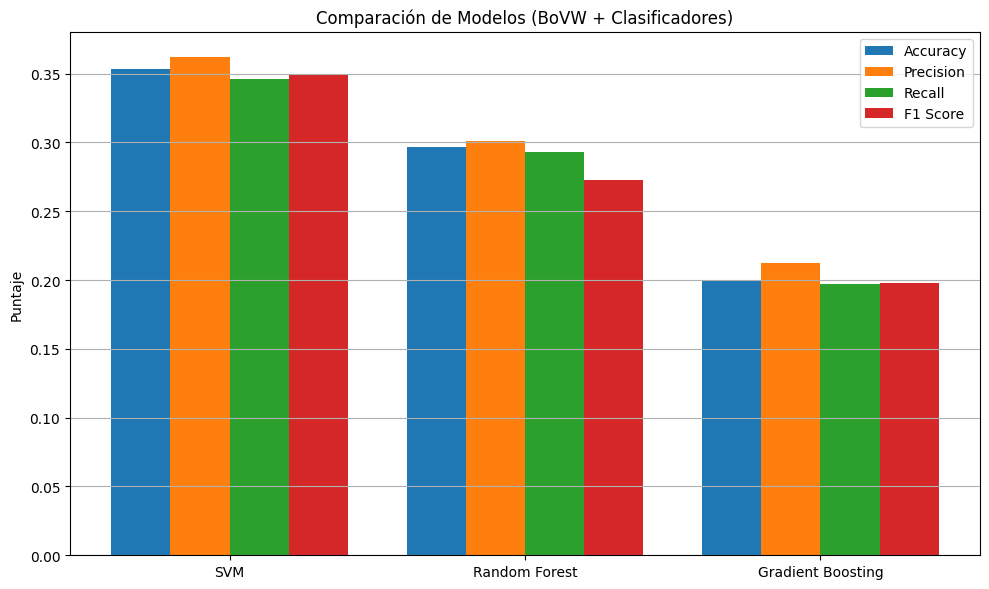

In [27]:



# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metricas['Modelo']))
width = 0.2

ax.bar(x - 1.5*width, metricas['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5*width, metricas['Precision'], width, label='Precision')
ax.bar(x + 0.5*width, metricas['Recall'], width, label='Recall')
ax.bar(x + 1.5*width, metricas['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Puntaje')
ax.set_title('Comparación de Modelos (BoVW + Clasificadores)')
ax.set_xticks(x)
ax.set_xticklabels(metricas['Modelo'])
ax.legend()
plt.tight_layout()
plt.grid(axis='y')

plt.show()

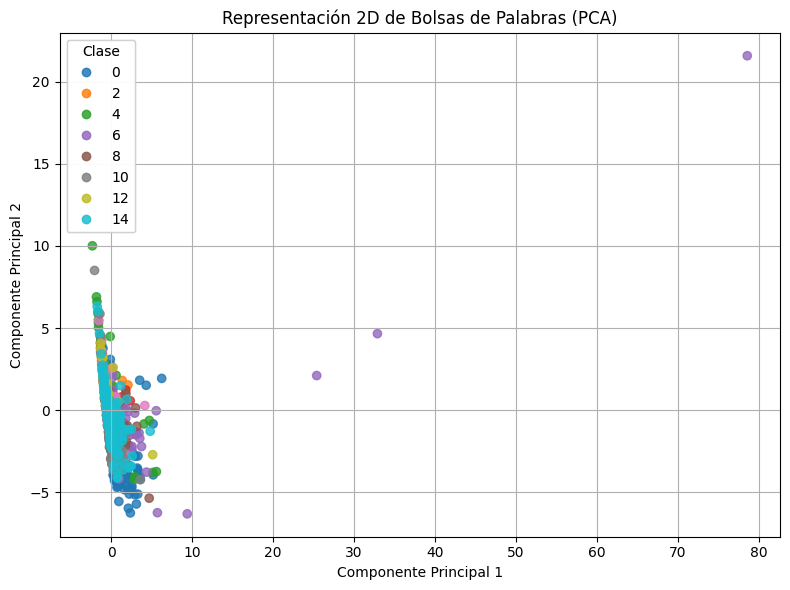

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)  # Usar las bolsas de palabras ya preparadas

# Crear gráfico en 2D
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.8)

# Añadir leyenda por clase
legend = ax.legend(*scatter.legend_elements(), title="Clase")
ax.add_artist(legend)

ax.set_title("Representación 2D de Bolsas de Palabras (PCA)")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

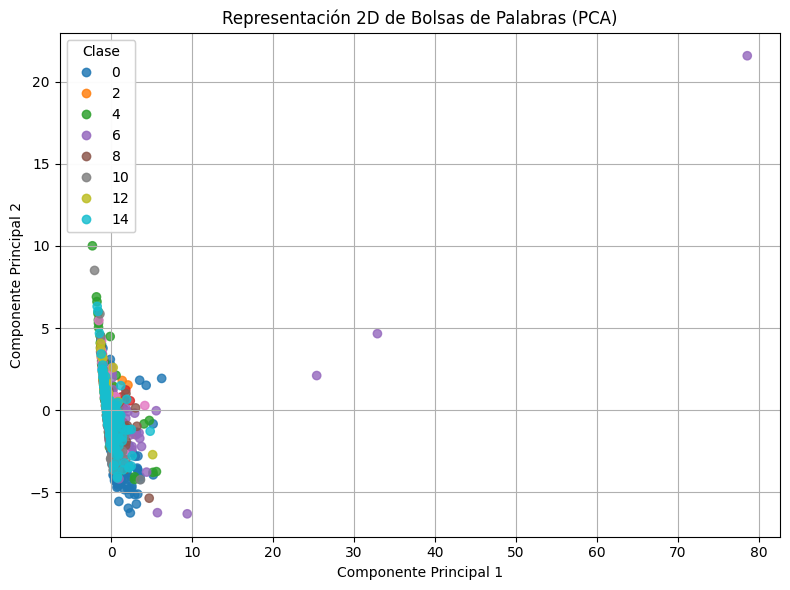

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)  # Usar las bolsas de palabras ya preparadas

# Crear gráfico en 2D
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.8)

# Añadir leyenda por clase
legend = ax.legend(*scatter.legend_elements(), title="Clase")
ax.add_artist(legend)

ax.set_title("Representación 2D de Bolsas de Palabras (PCA)")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()
